In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../data/howpop_train.csv')

In [3]:
df.shape

(134137, 17)

In [23]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14


In [8]:
df.drop((x for x in df.columns if 'lognorm' in x),axis=1, inplace=True)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [13]:
df.describe(include=['object', 'bool']).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/company/veeam/blog/257579/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [14]:
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5,rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [17]:
df['published'] = pd.to_datetime(df.published, yearfirst = True)

In [18]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

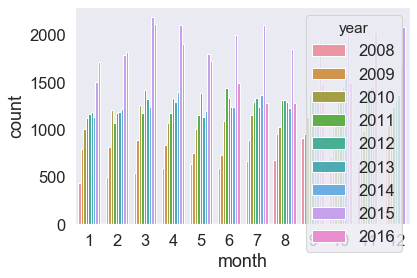

In [36]:
sns.countplot(x='month', hue='year', data=df);

In [39]:
dfMarch2015=df[(df['month']==3) & (df['year']==2015)]

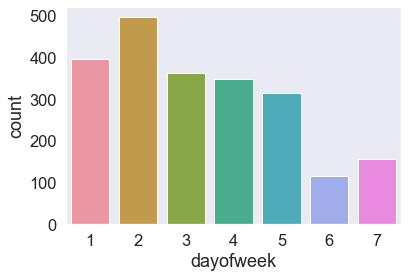

In [42]:
sns.countplot(x='dayofweek', data=dfMarch2015);

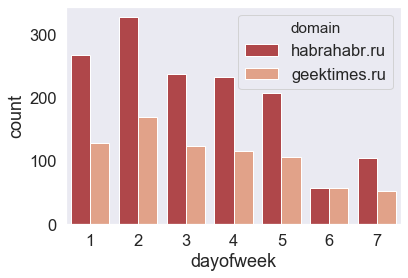

In [47]:
sns.countplot(x='dayofweek', hue='domain', data=dfMarch2015);

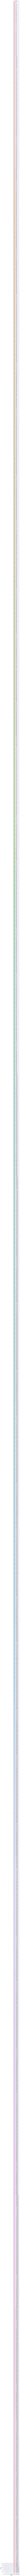

In [68]:
sns.countplot(x='hour',hue='views', data=df);

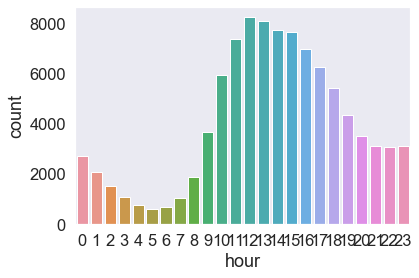

In [67]:
sns.countplot(x='hour', data=df[df['domain']=='habrahabr.ru']);

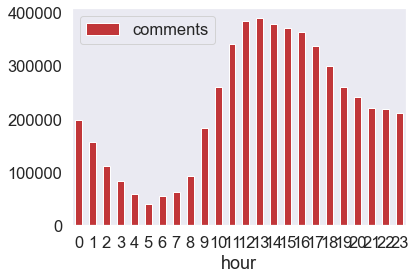

In [92]:
sales_df = df[['hour'] + ['comments']]
sales_df.groupby('hour').sum().plot(kind='bar', rot=0);

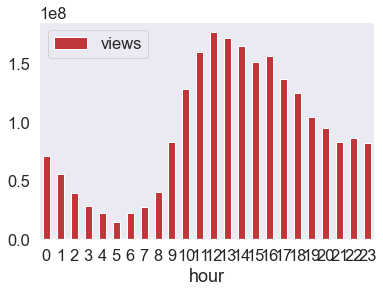

In [91]:
sales_df = df[['hour'] + ['views']]
sales_df.groupby('hour').sum().plot(kind='bar', rot=0 );

In [96]:
df[df['comments']==2266]['hour']

38763    2
Name: hour, dtype: int64

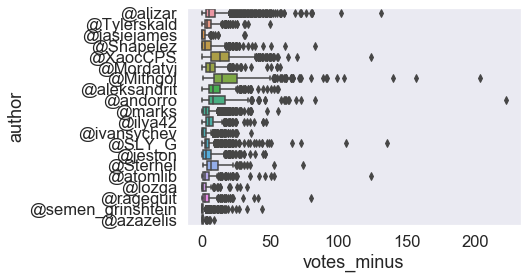

In [98]:
top_authors = df.author.value_counts().sort_values(ascending = False).head(20).index.values
sns.boxplot(y="author", x="votes_minus", data=df[df.author.isin(top_authors)], orient="h")

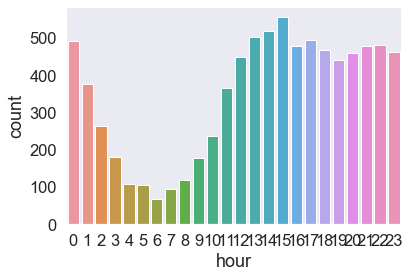

In [103]:
sns.countplot(x='hour', data=df[df['dayofweek']==6]);

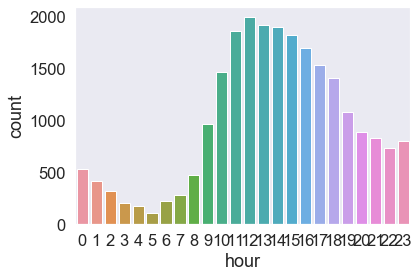

In [105]:
sns.countplot(x='hour', data=df[df['dayofweek']==1]);